In [1]:
import pandas as pd
import os

# Base directory where all the Tp{t}_mcesdf.csv files are stored
data_dir = '/home/priya/Desktop/fyp/Src alwin/Src/data/AJBU.SI'  # No {t} here

# Store results here
all_top_features = []

# Loop through t+1 to t+13
for t in range(1, 14):
    file_name = f'Tp{t}_mcesdf.csv'
    file_path = os.path.join(data_dir, f'Tp{t}', file_name)

    try:
        # Read the MCES result file
        df = pd.read_csv(file_path)

        # Add model name
        df['model'] = f't+{t}'

        # Get the feature with highest weighted score
        top_feature = df.sort_values(by='weighted_scores', ascending=False).iloc[0]

        all_top_features.append({
            'Model': f't+{t}',
            'Top Feature': top_feature['cols'],
            'Weighted Score': top_feature['weighted_scores']
        })

    except FileNotFoundError:
        print(f'File {file_path} not found, skipping...')

# Convert results to DataFrame
top_features_df = pd.DataFrame(all_top_features)

# Display or export
print(top_features_df)

# Optional: save to CSV
top_features_df.to_csv('top_mces_features_by_model.csv', index=False)


   Model     Top Feature  Weighted Score
0    t+1  x_Tm4_PriceChg        0.000466
1    t+2  x_Tm4_PriceChg        0.002310
2    t+3  x_Tm1_PriceChg        0.000376
3    t+4  x_Tm4_PriceChg        0.000647
4    t+5  x_Tm1_PriceChg        0.001190
5    t+6    x_Tm2_VolChg        0.000445
6    t+7   x_Tm13_VolChg        0.001288
7    t+8     x_Tm1_PRoc1        0.000617
8    t+9     x_Tm7_PRoc1        0.001449
9   t+10   x_Tm13_VolChg        0.000731
10  t+11  x_Tm5_PriceChg        0.000566
11  t+12   x_Tm11_VolChg        0.000537
12  t+13     x_Tm4_PRoc1        0.001780


In [2]:
import pandas as pd
import os

# Directory containing MCES result files
data_dir = '/home/priya/Desktop/fyp/Src alwin/Src/data/AJBU.SI'

# List to hold top 13 features per model
top13_summary = []

# Loop through t+1 to t+13
for t in range(1, 14):
    file_name = f'Tp{t}_mcesdf.csv'
    file_path = os.path.join(data_dir, f'Tp{t}', file_name)

    try:
        df = pd.read_csv(file_path)
        df = df.sort_values(by='weighted_scores', ascending=False).head(13)

        row = {'Model': f't+{t}'}
        for i in range(13):
            row[f'Feature {i+1}'] = df.iloc[i]['cols']
            row[f'Feedback {i+1}'] = df.iloc[i]['weighted_scores']
        
        top13_summary.append(row)

    except Exception as e:
        print(f"Skipping t+{t} due to error: {e}")

# Create DataFrame
top13_df = pd.DataFrame(top13_summary)

# Clean feature names
def clean_feat(name):
    return name.replace('_', ' ').replace('Chg', '').replace('PRoc1', 'ROC').replace('Tm', 't-').replace('x', '')

for i in range(1, 14):
    top13_df[f'Feature {i}'] = top13_df[f'Feature {i}'].apply(clean_feat)

# Display or export
print(top13_df)
top13_df.to_csv('top13_mces_features_per_model.csv', index=False)


   Model   Feature 1  Feedback 1    Feature 2  Feedback 2    Feature 3  \
0    t+1   t-4 Price    0.000466    t-3 Price    0.000399    t-7 Price   
1    t+2   t-4 Price    0.002310    t-1 Price    0.000592      t-9 Vol   
2    t+3   t-1 Price    0.000376    t-4 Price    0.000352     t-13 Vol   
3    t+4   t-4 Price    0.000647   t-10 Price    0.000228    t-9 Price   
4    t+5   t-1 Price    0.001190    t-3 Price    0.000678    t-2 Price   
5    t+6     t-2 Vol    0.000445    t-4 Price    0.000322      t-5 Vol   
6    t+7    t-13 Vol    0.001288     t-12 Vol    0.000623      t-6 Vol   
7    t+8     t-1 ROC    0.000617      t-6 ROC    0.000460      t-7 Vol   
8    t+9     t-7 ROC    0.001449   t-10 Price    0.000643     t-11 ROC   
9   t+10    t-13 Vol    0.000731     t-13 ROC    0.000274      t-1 ROC   
10  t+11   t-5 Price    0.000566     t-10 ROC    0.000270   t-10 Price   
11  t+12    t-11 Vol    0.000537     t-10 Vol    0.000390    t-4 Price   
12  t+13     t-4 ROC    0.001780     t

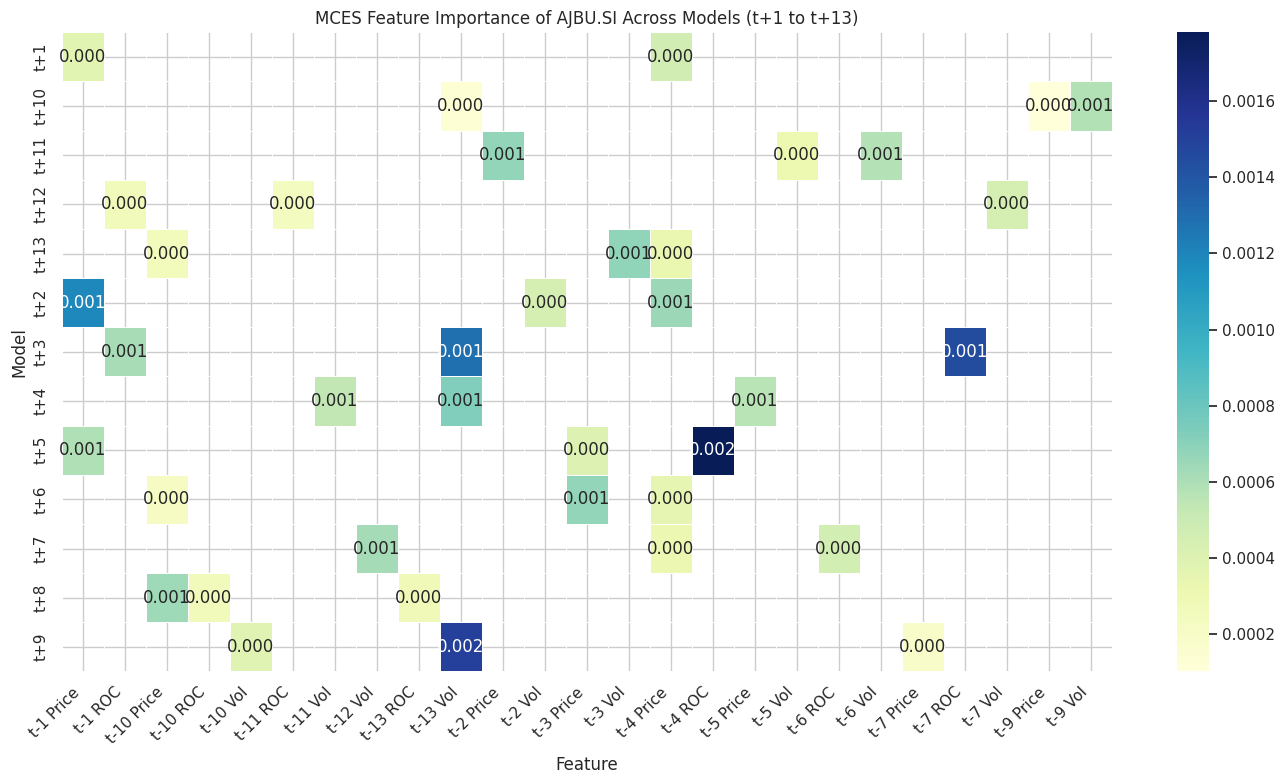

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the just-saved top3 summary CSV
top3_df = pd.read_csv("/home/priya/Desktop/fyp/Src alwin/Src/data/AJBU.SI/top13_mces_features_per_model.csv")

# Convert wide format to long for visualization
long_df = pd.DataFrame({
    'Model': top3_df['Model'].repeat(3).reset_index(drop=True),
    'Feature': pd.concat([top3_df['Feature 1'], top3_df['Feature 2'], top3_df['Feature 3']], ignore_index=True),
    'Feedback': pd.concat([top3_df['Feedback 1'], top3_df['Feedback 2'], top3_df['Feedback 3']], ignore_index=True)
})

# Create a pivot table for heatmap (Models as rows, Features as columns)
pivot_df = long_df.pivot_table(index='Model', columns='Feature', values='Feedback', aggfunc='first')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt=".3f", linewidths=0.5)
plt.title("MCES Feature Importance of AJBU.SI Across Models (t+1 to t+13)")
plt.ylabel("Model")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import os

# Directory containing the MCES result files
data_dir = '/home/priya/Desktop/fyp/Src alwin/Src/data/AJBU.SI'  # No {t} here

# List to hold each model's top 3 features and their scores
top3_summary = []

# Loop through t+1 to t+13
for t in range(1, 14):
    file_name = f'Tp{t}_mcesdf.csv'
    file_path = os.path.join(data_dir, f'Tp{t}', file_name)

    try:
        df = pd.read_csv(file_path)
        df = df.sort_values(by='weighted_scores', ascending=False).head(3)

        # Format raw feature names
        row = {
            'Model': f't+{t}',
            'Feature 1': df.iloc[0]['cols'],
            'Feedback 1': df.iloc[0]['weighted_scores'],
            'Feature 2': df.iloc[1]['cols'],
            'Feedback 2': df.iloc[1]['weighted_scores'],
            'Feature 3': df.iloc[2]['cols'],
            'Feedback 3': df.iloc[2]['weighted_scores'],
        }
        top3_summary.append(row)

    except Exception as e:
        print(f"[Warning] Skipping t+{t} due to error: {e}")

# Create summary DataFrame
top3_df = pd.DataFrame(top3_summary)

# Clean feature names for readability
def clean_feat(name):
    return name.replace('_', ' ')\
               .replace('Chg', '')\
               .replace('PRoc1', 'ROC')\
               .replace('Tm', 't-')\
               .replace('x', '')\
               .strip()

for i in range(1, 4):
    top3_df[f'Feature {i}'] = top3_df[f'Feature {i}'].apply(clean_feat)

# Display the cleaned summary
print(top3_df)

# Save to CSV
output_path = os.path.join(data_dir, 'top3_mces_features_per_model.csv')
top3_df.to_csv(output_path, index=False)
print(f"\n✅ Saved to {output_path}")


   Model  Feature 1  Feedback 1   Feature 2  Feedback 2   Feature 3  \
0    t+1  t-4 Price    0.000466   t-3 Price    0.000399   t-7 Price   
1    t+2  t-4 Price    0.002310   t-1 Price    0.000592     t-9 Vol   
2    t+3  t-1 Price    0.000376   t-4 Price    0.000352    t-13 Vol   
3    t+4  t-4 Price    0.000647  t-10 Price    0.000228   t-9 Price   
4    t+5  t-1 Price    0.001190   t-3 Price    0.000678   t-2 Price   
5    t+6    t-2 Vol    0.000445   t-4 Price    0.000322     t-5 Vol   
6    t+7   t-13 Vol    0.001288    t-12 Vol    0.000623     t-6 Vol   
7    t+8    t-1 ROC    0.000617     t-6 ROC    0.000460     t-7 Vol   
8    t+9    t-7 ROC    0.001449  t-10 Price    0.000643    t-11 ROC   
9   t+10   t-13 Vol    0.000731    t-13 ROC    0.000274     t-1 ROC   
10  t+11  t-5 Price    0.000566    t-10 ROC    0.000270  t-10 Price   
11  t+12   t-11 Vol    0.000537    t-10 Vol    0.000390   t-4 Price   
12  t+13    t-4 ROC    0.001780    t-13 Vol    0.001511     t-3 Vol   

    F

In [7]:
import pandas as pd

df = pd.read_csv('top3_mces_features_per_model.csv')
print(df.columns.tolist())
print(df.head())


['Model', 'Feature 1', 'Feedback 1', 'Feature 2', 'Feedback 2', 'Feature 3', 'Feedback 3']
  Model  Feature 1  Feedback 1   Feature 2  Feedback 2  Feature 3  Feedback 3
0   t+1  t-4 Price    0.000466   t-3 Price    0.000399  t-7 Price    0.000192
1   t+2  t-4 Price    0.002310   t-1 Price    0.000592    t-9 Vol    0.000583
2   t+3  t-1 Price    0.000376   t-4 Price    0.000352   t-13 Vol    0.000134
3   t+4  t-4 Price    0.000647  t-10 Price    0.000228  t-9 Price    0.000103
4   t+5  t-1 Price    0.001190   t-3 Price    0.000678  t-2 Price    0.000676


In [8]:
import pandas as pd
from collections import Counter

# Load data
df = pd.read_csv("top3_mces_features_per_model.csv")

# Convert wide format to long format
long_df = pd.DataFrame({
    'Model': df['Model'].repeat(3).reset_index(drop=True),
    'Feature': pd.concat([df['Feature 1'], df['Feature 2'], df['Feature 3']], ignore_index=True),
    'Feedback': pd.concat([df['Feedback 1'], df['Feedback 2'], df['Feedback 3']], ignore_index=True)
})

# Count frequency of each feature
feature_counts = long_df['Feature'].value_counts().reset_index()
feature_counts.columns = ['Feature', 'Frequency']

# Calculate average feedback per feature
feature_avg_feedback = long_df.groupby('Feature')['Feedback'].mean().reset_index()
feature_avg_feedback.columns = ['Feature', 'Avg Feedback']

# Merge both metrics
feature_summary = pd.merge(feature_counts, feature_avg_feedback, on='Feature')

# Sort by frequency and feedback
feature_summary = feature_summary.sort_values(by=['Frequency', 'Avg Feedback'], ascending=[False, False]).reset_index(drop=True)

# Display results
print("Feature Summary (Frequency + Avg Feedback):")
print(feature_summary)

# Save to CSV
feature_summary.to_csv("feature_summary.csv", index=False)


Feature Summary (Frequency + Avg Feedback):
       Feature  Frequency  Avg Feedback
0    t-4 Price          6      0.000737
1     t-13 Vol          4      0.000916
2    t-1 Price          3      0.000719
3   t-10 Price          3      0.000375
4    t-3 Price          2      0.000538
5      t-1 ROC          2      0.000442
6      t-4 ROC          1      0.001780
7      t-7 ROC          1      0.001449
8      t-3 Vol          1      0.000685
9    t-2 Price          1      0.000676
10    t-12 Vol          1      0.000623
11     t-9 Vol          1      0.000583
12     t-6 Vol          1      0.000580
13   t-5 Price          1      0.000566
14    t-11 Vol          1      0.000537
15     t-6 ROC          1      0.000460
16     t-7 Vol          1      0.000449
17     t-2 Vol          1      0.000445
18    t-10 Vol          1      0.000390
19     t-5 Vol          1      0.000314
20    t-13 ROC          1      0.000274
21    t-10 ROC          1      0.000270
22    t-11 ROC          1      0.000

/tmp/ipykernel_107549/356915464.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(
/tmp/ipykernel_107549/356915464.py:34: UserWarning: 
The palette list has fewer values (6) than needed (25) and will cycle, which may produce an uninterpretable plot.
  bar = sns.barplot(


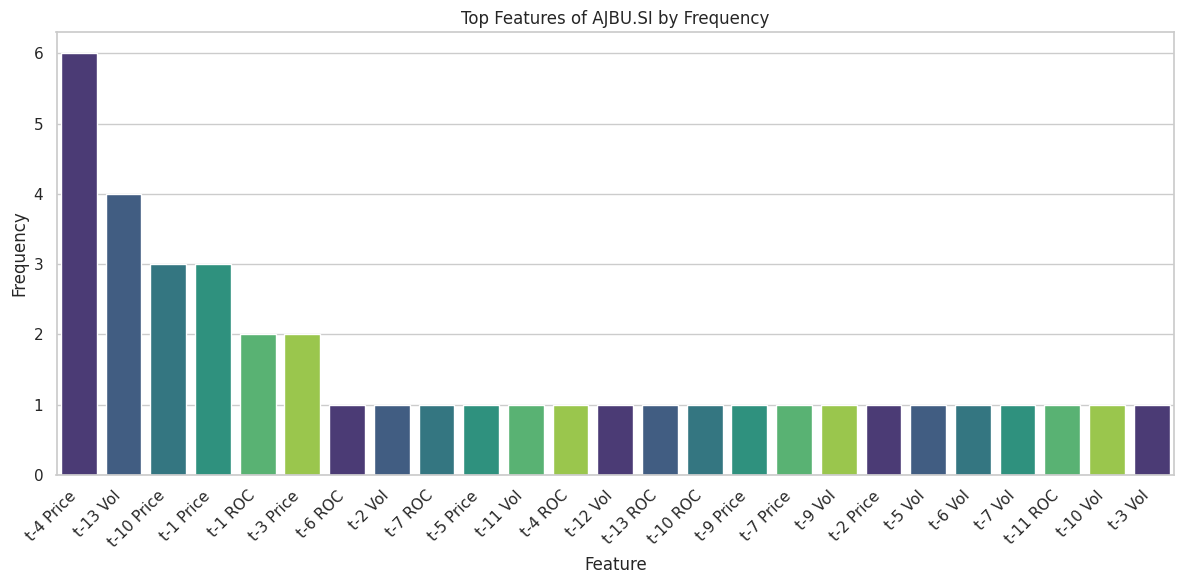

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV again
df = pd.read_csv("/home/priya/Desktop/fyp/Src alwin/Src/data/AJBU.SI/top3_mces_features_per_model.csv")

# Reshape the wide format into long format
long_df = pd.DataFrame({
    'Model': df['Model'].repeat(3).reset_index(drop=True),
    'Feature': pd.concat([df['Feature 1'], df['Feature 2'], df['Feature 3']], ignore_index=True),
    'Feedback': pd.concat([df['Feedback 1'], df['Feedback 2'], df['Feedback 3']], ignore_index=True)
})

# Count frequency
feature_counts = long_df['Feature'].value_counts().reset_index()
feature_counts.columns = ['Feature', 'Frequency']

# Average feedback
feature_avg = long_df.groupby('Feature')['Feedback'].mean().reset_index()
feature_avg.columns = ['Feature', 'Avg Feedback']

# Merge both
summary_df = pd.merge(feature_counts, feature_avg, on='Feature')

# Sort for plotting
summary_df = summary_df.sort_values(by='Frequency', ascending=False)

# Set plot style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Barplot with color intensity based on feedback
bar = sns.barplot(
    data=summary_df,
    x='Feature',
    y='Frequency',
    palette=sns.color_palette("viridis", as_cmap=False)
)

plt.title('Top Features of AJBU.SI by Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import os

tickers = ['AJBU.SI']  # Example tickers
base_data_dir = '/home/priya/Desktop/fyp/Src alwin/Src/data'

outcomes = {}
all_top_features = []

for ticker in tickers:
    ticker_df = pd.DataFrame()

    for t in range(1, 14):
        ticker_dir = os.path.join(base_data_dir, ticker, f'Tp{t}')  # Moved inside the loop
        file_name = f'Tp{t}_mcesdf.csv'
        file_path = os.path.join(ticker_dir, file_name)

        try:
            df = pd.read_csv(file_path)
            df = df.sort_values(by='weighted_scores', ascending=False)

            # Append top 6 features to the aggregated DataFrame
            top6_df = df[['cols']].head(6)
            ticker_df = pd.concat([ticker_df, top6_df], axis=0)

            # # Record the top 1 feature for this model
            # top_feature = df.iloc[0]
            # all_top_features.append({
            #     'Ticker': ticker,
            #     'Model': f't+{t}',
            #     'Top Feature': top_feature['cols'],
            #     'Weighted Score': top_feature['weighted_scores']
            # })
            # Record the top 3 features for this model
            top3_df = df[['cols', 'weighted_scores']].head(3)
            for i, row in top3_df.iterrows():
                all_top_features.append({
                    'Ticker': ticker,
                    'Model': f't+{t}',
                    'Rank': f'Top {i+1}',
                    'Feature': row['cols'],
                    'Weighted Score': row['weighted_scores']
                })


        except FileNotFoundError:
            print(f'File {file_path} not found, skipping...')

    # Process cumulative top features for the ticker
    ticker_df = ticker_df.groupby('cols').agg({'cols': 'count'})
    ticker_df = ticker_df.rename(columns={'cols': 'Count'})
    ticker_df = ticker_df.sort_values(by=['Count', 'cols'], ascending=[False, True])
    ticker_df = ticker_df.reset_index(drop=False)
    ticker_df = ticker_df.rename(columns={'cols': 'Feature'})

    # Clean feature names
# Final combined DataFrame of top features per model and ticker
top_features_df = pd.DataFrame(all_top_features)

# Clean feature names
top_features_df['Feature'] = top_features_df['Feature'].apply(
    lambda x: x.replace('_', ' ')
               .replace('Chg', '')
               .replace('PRoc1', 'ROC')
               .replace('Tm', 't-')
               .replace('x', '')
)

# Save to CSV if needed
top_features_df.to_csv('top_mces_features_by_model.csv', index=False)

# Display
print("Top 3 features per model:")
print(top_features_df)


Top 3 features per model:
     Ticker Model   Rank      Feature  Weighted Score
0   AJBU.SI   t+1  Top 1    t-4 Price        0.000466
1   AJBU.SI   t+1  Top 2    t-3 Price        0.000399
2   AJBU.SI   t+1  Top 3    t-7 Price        0.000192
3   AJBU.SI   t+2  Top 1    t-4 Price        0.002310
4   AJBU.SI   t+2  Top 2    t-1 Price        0.000592
5   AJBU.SI   t+2  Top 3      t-9 Vol        0.000583
6   AJBU.SI   t+3  Top 1    t-1 Price        0.000376
7   AJBU.SI   t+3  Top 2    t-4 Price        0.000352
8   AJBU.SI   t+3  Top 3     t-13 Vol        0.000134
9   AJBU.SI   t+4  Top 1    t-4 Price        0.000647
10  AJBU.SI   t+4  Top 2   t-10 Price        0.000228
11  AJBU.SI   t+4  Top 3    t-9 Price        0.000103
12  AJBU.SI   t+5  Top 1    t-1 Price        0.001190
13  AJBU.SI   t+5  Top 2    t-3 Price        0.000678
14  AJBU.SI   t+5  Top 3    t-2 Price        0.000676
15  AJBU.SI   t+6  Top 1      t-2 Vol        0.000445
16  AJBU.SI   t+6  Top 2    t-4 Price        0.000322
17

In [15]:
import pandas as pd

# List of stock tickers and their corresponding file paths
# stock_files = {
#     'C38U.SI': '/home/priya/Desktop/fyp/Src alwin/Src/data/C38U.SI/statistics_before_ensemble.csv',
#     'AJBU.SI': '/home/priya/Desktop/fyp/Src alwin/Src/data/AJBU.SI/statistics_before_ensemble.csv',
#     'Q0F.SI': '/home/priya/Desktop/fyp/Src alwin/Src/data/Q0F.SI/statistics_before_ensemble.csv',
#     'S63.SI': '/home/priya/Desktop/fyp/Src alwin/Src/data/S63.SI/statistics_before_ensemble.csv',
#     'S68.SI':  '/home/priya/Desktop/fyp/Src alwin/Src/data/S68.SI/statistics_before_ensemble.csv',
#     'U11.SI': '/home/priya/Desktop/fyp/Src alwin/Src/data/U11.SI/statistics_before_ensemble.csv',

# }

stock_files = {
    'C38U.SI': '/home/priya/Desktop/fyp/Src alwin/Src/data/C38U.SI/ensemble_outputs/C38U.SI_ensemble_stats.csv',
    'AJBU.SI': '/home/priya/Desktop/fyp/Src alwin/Src/data/AJBU.SI/ensemble_outputs/AJBU.SI_ensemble_stats.csv',
    'Q0F.SI': '//home/priya/Desktop/fyp/Src alwin/Src/data/Q0F.SI/ensemble_outputs/Q0F.SI_ensemble_stats.csv',
    'S63.SI': '/home/priya/Desktop/fyp/Src alwin/Src/data/S63.SI/ensemble_outputs/S63.SI_ensemble_stats.csv',
    'S68.SI':  '/home/priya/Desktop/fyp/Src alwin/Src/data/S68.SI/ensemble_outputs/S68.SI_ensemble_stats.csv',
    'U11.SI': '/home/priya/Desktop/fyp/Src alwin/Src/data/U11.SI/ensemble_outputs/U11.SI_ensemble_stats.csv',

}

all_dfs = []

for ticker, path in stock_files.items():
    df = pd.read_csv(path)
    df['Ticker'] = ticker
    df['Tp'] = df['columns'].str.extract(r'Tp(\d+)').astype(int)
    all_dfs.append(df[['Ticker', 'Tp', 'r2', 'rmse', 'mape']])

# Combine all into one dataframe
combined_df = pd.concat(all_dfs, ignore_index=True)

# Sort by Tp and Ticker
combined_df = combined_df.sort_values(by=['Tp', 'Ticker']).reset_index(drop=True)
combined_df.to_csv('/home/priya/Desktop/fyp/combined_statistics.csv', index=False)
print("✅ Combined statistics saved.")


✅ Combined statistics saved.


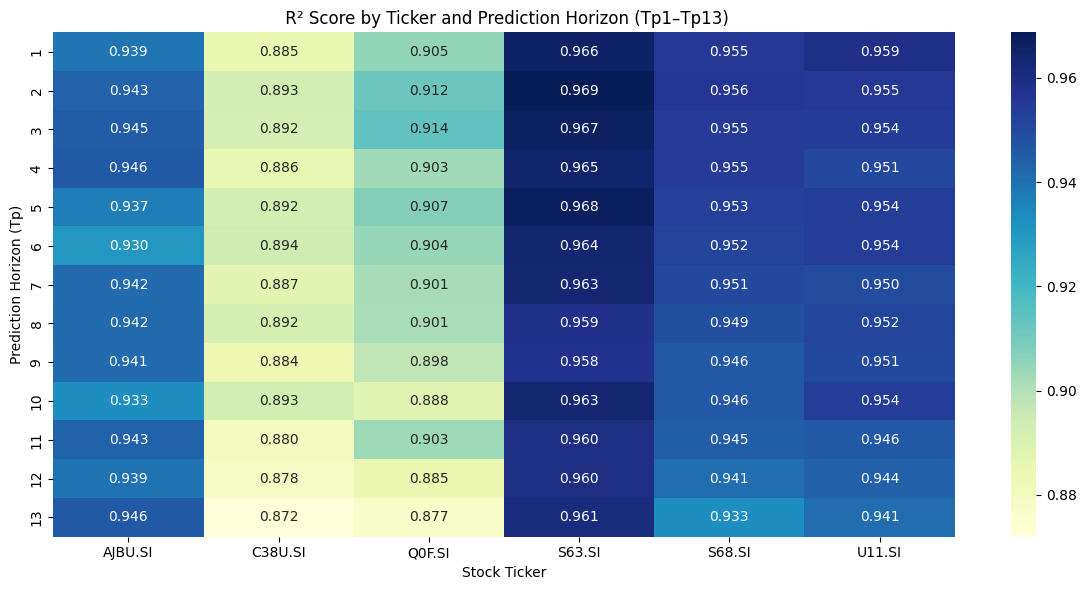

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_r2 = combined_df.pivot(index='Tp', columns='Ticker', values='r2_price')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_r2, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title(" R² Score by Ticker and Prediction Horizon (Tp1–Tp13)")
plt.ylabel("Prediction Horizon (Tp)")
plt.xlabel("Stock Ticker")
plt.tight_layout()
plt.savefig('/home/priya/Desktop/fyp/r2_heatmap.png')
plt.show()



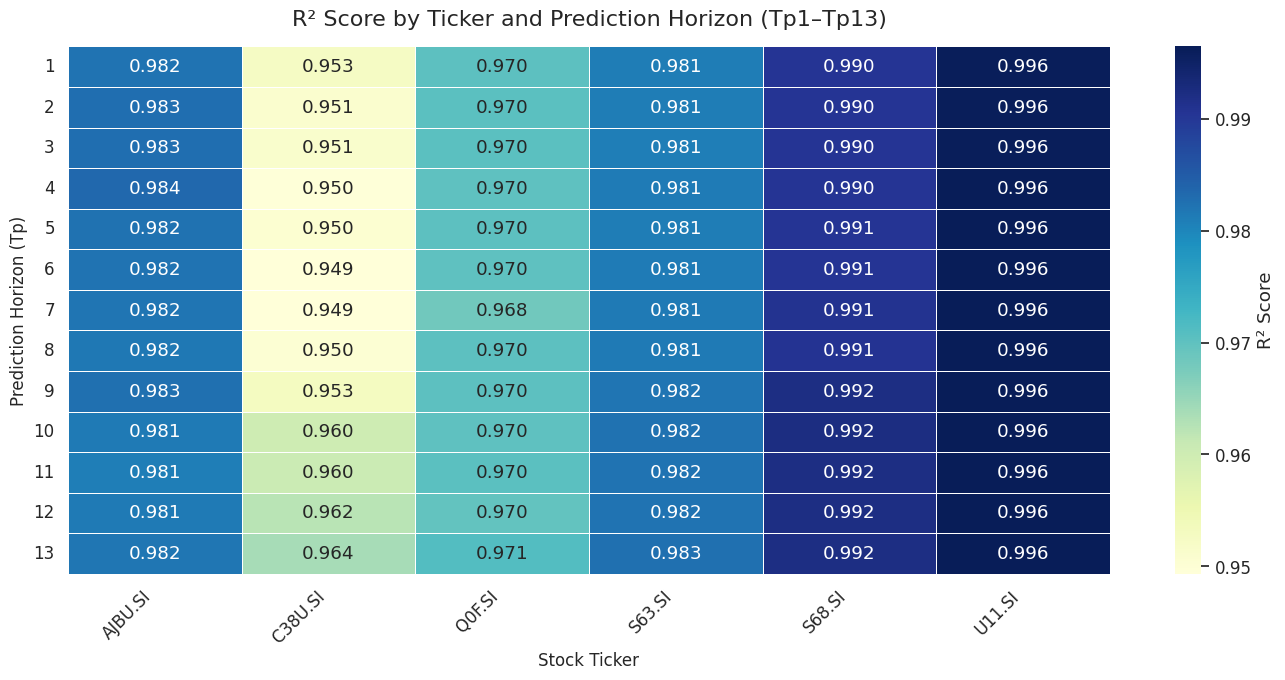

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot R² values: Tp (1–13) vs Ticker
pivot_r2 = combined_df.pivot(index='Tp', columns='Ticker', values='r2')

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid', font_scale=1.1)

# Heatmap with annotations, rounded values
heatmap = sns.heatmap(
    pivot_r2, 
    annot=True, 
    fmt=".3f", 
    cmap='YlGnBu', 
    linewidths=0.5, 
    cbar_kws={'label': 'R² Score'}
)

# Aesthetics
plt.title("R² Score by Ticker and Prediction Horizon (Tp1–Tp13)", fontsize=16, pad=15)
plt.ylabel("Prediction Horizon (Tp)", fontsize=12)
plt.xlabel("Stock Ticker", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save and show
plt.savefig('/home/priya/Desktop/fyp/r2_heatmap_clean.png', dpi=300)
plt.show()


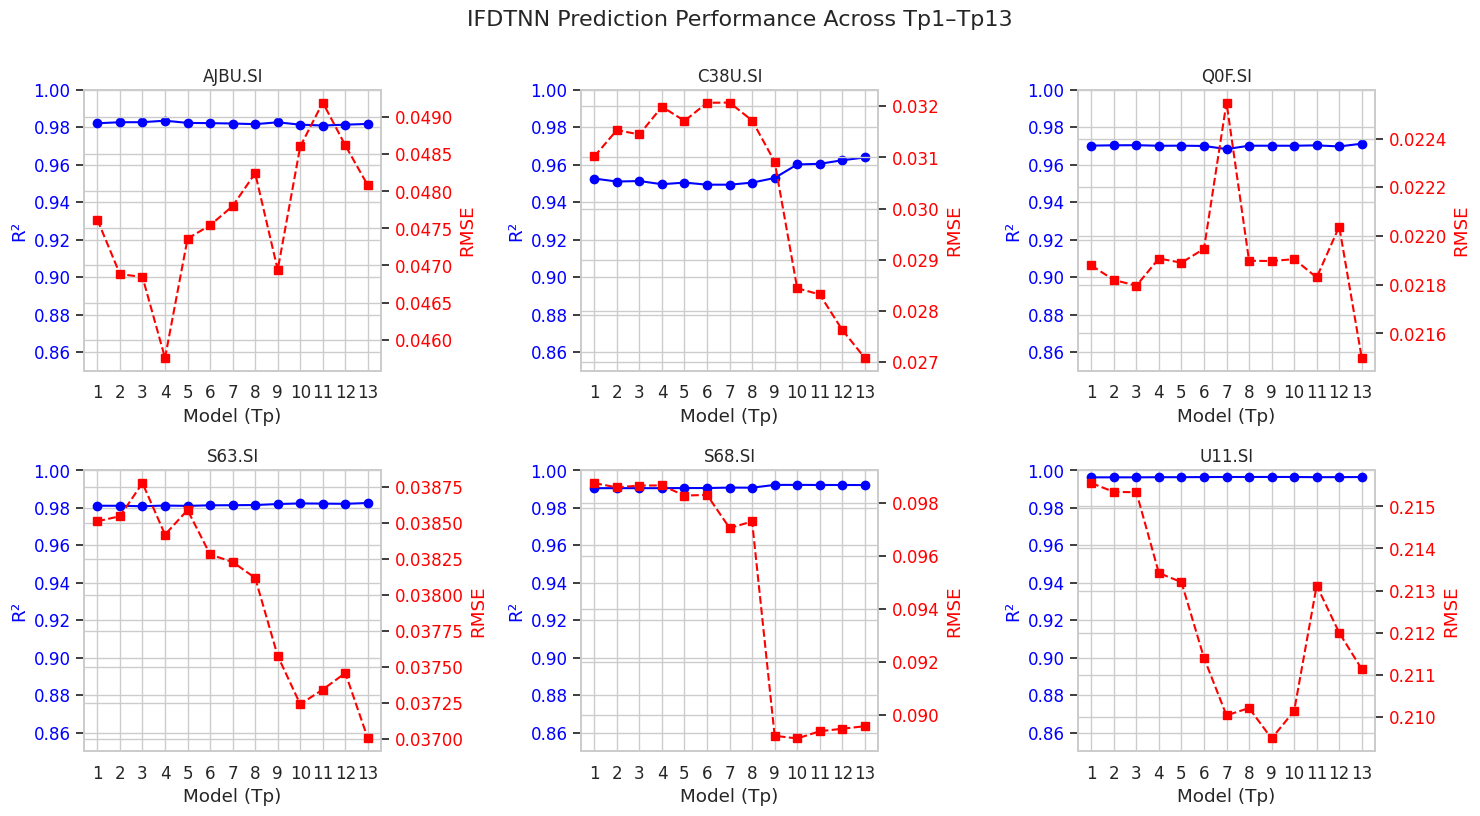

In [18]:
import matplotlib.pyplot as plt

# Convert Tp to integer
combined_df['Tp'] = combined_df['Tp'].astype(int)

# Auto-detect column names
r2_col = next((col for col in combined_df.columns if 'r2' in col.lower()), 'r2')
rmse_col = next((col for col in combined_df.columns if 'rmse' in col.lower()), 'rmse')

tickers = sorted(combined_df['Ticker'].unique())
ncols = 3
nrows = (len(tickers) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4 * nrows))
axes = axes.flatten()

for idx, ticker in enumerate(tickers):
    ax1 = axes[idx]
    df = combined_df[combined_df['Ticker'] == ticker].sort_values('Tp')

    ax1.set_title(ticker.upper(), fontsize=12)
    ax1.set_xlabel('Model (Tp)')
    ax1.set_ylabel('R²', color='blue')
    ax1.plot(df['Tp'], df[r2_col], color='blue', marker='o')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(df['Tp'])
    ax1.set_ylim(0.85, 1.0)

    ax2 = ax1.twinx()
    ax2.set_ylabel('RMSE', color='red')
    ax2.plot(df['Tp'], df[rmse_col], color='red', marker='s', linestyle='--')
    ax2.tick_params(axis='y', labelcolor='red')

# Remove any extra empty subplots
for j in range(len(tickers), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('IFDTNN Prediction Performance Across Tp1–Tp13', fontsize=16, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('/home/priya/Desktop/fyp/ifdtnn_prediction_performance_grid_clean.png', dpi=300)
plt.show()
